# <center>Machine Learning Project</center>

** **
## <center>*03 - Base Model Notebook*</center>

** **

Description of the notebook

Simple Model with evaluation



The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Sofia Gomes - 20240848
- Rui Lourenço - 2021639

In [31]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [32]:
# Import dataset
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')
df

C:\Users\abdar\AppData\Local\Temp\ipykernel_16784\4090981752.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Remove the na to make the visualization possible
df = df.dropna(subset=['Claim Injury Type'])

In [34]:
# Encode the target variable
label_encoder = LabelEncoder()
df['Claim Injury Type Encoded'] = label_encoder.fit_transform(df['Claim Injury Type'])

C:\Users\abdar\AppData\Local\Temp\ipykernel_16784\1942064479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim Injury Type Encoded'] = label_encoder.fit_transform(df['Claim Injury Type'])


In [35]:
# Define features and target
X = df[['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Number of Dependents']]
y = df['Claim Injury Type Encoded']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [37]:
# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: np.float64(5.725935162094763),
 1: np.float64(0.24672268546376688),
 2: np.float64(1.0407110611527095),
 3: np.float64(0.4830843677677256),
 4: np.float64(1.4834603953999224),
 5: np.float64(16.902974087161365),
 6: np.float64(691.5963855421687),
 7: np.float64(151.45778364116094)}

In [38]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [39]:
model = keras.Sequential()
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))  # Dropout 30% of neurons
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="softmax"))

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=[X_val,y_val],
    epochs=20,
    batch_size=200,
    class_weight=class_weights_dict
)


Epoch 1/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1249 - loss: 2.0303 - val_accuracy: 0.0214 - val_loss: 2.0785
Epoch 2/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0158 - loss: 2.0973 - val_accuracy: 0.0071 - val_loss: 2.0781
Epoch 3/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0062 - loss: 2.1159 - val_accuracy: 0.0071 - val_loss: 2.0756
Epoch 4/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0223 - loss: 2.0835 - val_accuracy: 0.0214 - val_loss: 2.0789
Epoch 5/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0265 - loss: 2.0882 - val_accuracy: 0.0214 - val_loss: 2.0758
Epoch 6/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0340 - loss: 2.1145 - val_accuracy: 0.0214 - val_loss: 2.0779
Epoch 7/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0787 - loss: 2.0643 - val_accuracy: 0.0071 - val_loss: 2.0830
Epoch 8/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0444 - loss: 2.0440 - 

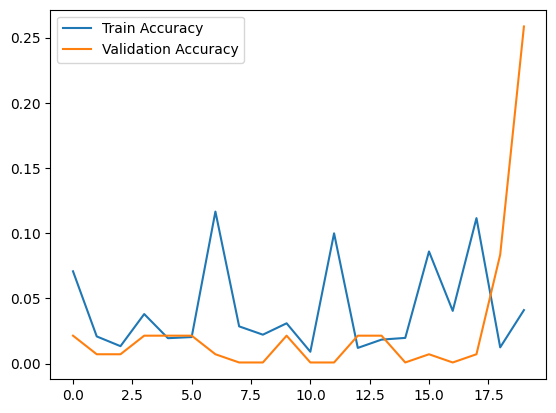

In [41]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [42]:
y_train_predicted = model.predict(X_train)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= model.predict(X_val)
y_val_predicted= np.argmax(y_val_predicted,axis=1)

14351/14351 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [43]:
print(classification_report(y_train.numpy(), y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10025
         1.0       0.00      0.00      0.00    232660
         2.0       0.00      0.00      0.00     55157
         3.0       0.26      1.00      0.41    118825
         4.0       0.00      0.00      0.00     38695
         5.0       0.00      0.00      0.00      3396
         6.0       0.00      0.00      0.00        83
         7.0       0.00      0.00      0.00       379

    accuracy                           0.26    459220
   macro avg       0.03      0.12      0.05    459220
weighted avg       0.07      0.26      0.11    459220



c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [44]:
print(classification_report(y_val.numpy(), y_val_predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2452
         1.0       0.00      0.00      0.00     58418
         2.0       0.00      0.00      0.00     13749
         3.0       0.26      1.00      0.41     29682
         4.0       0.00      0.00      0.00      9585
         5.0       0.00      0.00      0.00       815
         6.0       0.00      0.00      0.00        14
         7.0       0.00      0.00      0.00        91

    accuracy                           0.26    114806
   macro avg       0.03      0.12      0.05    114806
weighted avg       0.07      0.26      0.11    114806



c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdar\anaconda3\envs\ML_Project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [45]:
# Import dataset
test_df = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')
test_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5


In [46]:
X_test = test_df[['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code','WCIO Part Of Body Code', 'Number of Dependents']]

In [47]:
X_test = scaler.transform(X_test)

In [48]:
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [49]:
y_test_predicted = model.predict(X_test)
y_test_predicted= np.argmax(y_test_predicted,axis=1)

12125/12125 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step


In [50]:
test_id = test_df.index

In [51]:
submission_df = pd.DataFrame({
    'Claim Identifier': test_id,
    'Claim Injury Type': y_test_predicted
})

In [52]:
# Save the DataFrame to a CSV file
submission_df.to_csv('./submissions/Group49_Version01.csv', index=False)